# Summary

Here, we detected alternative TSS, then we want to identify TF binding with upstream 200bp.

# get bed file

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import scanpy as sc
import numpy as np

In [4]:
df=pd.read_csv('/storage/yhhuang/users/ruiyan/NPC/diffcluster/sign_Gene/T_cells.csv')
df

,GeneID,n_counts,n_counts_uniq,cdr,intercept,sigma,disease_NPC_ceoff,disease_NPC_ELBO_gain,disease_NPC_pval,disease_NPC_FDR
0,ENSG00000000460,737,737,0.03345,-1.1680,2.4840,2.4160,14.730,5.680000e-08,3.881000e-07
1,ENSG00000002919,1291,1291,0.07541,-5.6720,1.4660,1.4670,9.808,9.465000e-06,4.312000e-05
2,ENSG00000003402,3095,3095,0.38660,-0.9281,1.1020,-0.5811,14.420,7.890000e-08,4.622000e-07
3,ENSG00000005302,2083,2083,0.15900,-1.1920,1.9710,-0.6506,8.099,5.707000e-05,1.950000e-04
4,ENSG00000005844,1460,1460,0.29410,-4.0820,0.9809,0.8424,8.432,4.017000e-05,1.497000e-04
...,...,...,...,...,...,...,...,...,...,...
259,ENSG00000235831,421,421,0.02304,0.6866,1.1210,-1.8530,5.598,8.198000e-04,6.722000e-03
260,ENSG00000245937,1406,1406,0.07098,-3.9300,0.3806,1.2990,10.440,4.898000e-06,5.021000e-05
261,ENSG00000249859,2216,2216,0.10460,1.7280,1.9590,-1.4390,41.330,9.724000e-20,3.987000e-18
262,ENSG00000265148,1166,1166,0.07521,-3.3020,0.8062,1.2020,13.670,1.709000e-07,4.955000e-06


In [5]:
isoform1df=df[df['disease_NPC_ceoff']>0]
isoform1df

,GeneID,n_counts,n_counts_uniq,cdr,intercept,sigma,disease_NPC_ceoff,disease_NPC_ELBO_gain,disease_NPC_pval,disease_NPC_FDR
0,ENSG00000000460,737,737,0.03345,-1.168,2.4840,2.4160,14.730,5.680000e-08,3.881000e-07
1,ENSG00000002919,1291,1291,0.07541,-5.672,1.4660,1.4670,9.808,9.465000e-06,4.312000e-05
4,ENSG00000005844,1460,1460,0.29410,-4.082,0.9809,0.8424,8.432,4.017000e-05,1.497000e-04
6,ENSG00000008083,781,781,0.07985,-2.296,0.8233,1.0650,9.594,1.184000e-05,4.855000e-05
7,ENSG00000008513,2246,2246,0.21030,-4.311,1.6430,0.7121,5.900,5.925000e-04,1.735000e-03
...,...,...,...,...,...,...,...,...,...,...
254,ENSG00000215252,3260,3260,0.17940,-3.661,0.9634,1.1740,38.980,1.054000e-18,4.323000e-17
255,ENSG00000221946,2303,2303,0.06137,-3.756,0.9163,0.8629,7.099,1.646000e-04,1.687000e-03
257,ENSG00000234745,1411,1411,0.98760,-2.137,0.5495,1.1750,15.260,3.314000e-08,4.530000e-07
260,ENSG00000245937,1406,1406,0.07098,-3.930,0.3806,1.2990,10.440,4.898000e-06,5.021000e-05


In [6]:
isoform2df=df[df['disease_NPC_ceoff']<0]
isoform2df

,GeneID,n_counts,n_counts_uniq,cdr,intercept,sigma,disease_NPC_ceoff,disease_NPC_ELBO_gain,disease_NPC_pval,disease_NPC_FDR
2,ENSG00000003402,3095,3095,0.38660,-0.9281,1.1020,-0.5811,14.420,7.890000e-08,4.622000e-07
3,ENSG00000005302,2083,2083,0.15900,-1.1920,1.9710,-0.6506,8.099,5.707000e-05,1.950000e-04
5,ENSG00000007341,949,949,0.04697,1.2910,2.0180,-1.4280,17.510,3.260000e-09,3.341000e-08
8,ENSG00000009790,5047,5047,0.50890,0.5827,0.9721,-0.3570,10.080,7.091000e-06,3.634000e-05
10,ENSG00000010292,528,528,0.05043,1.0820,1.4810,-1.0570,6.112,4.720000e-04,1.488000e-03
...,...,...,...,...,...,...,...,...,...,...
256,ENSG00000225889,444,444,0.01860,-1.8650,1.1050,-1.6660,10.730,3.606000e-06,4.928000e-05
258,ENSG00000235194,996,996,0.05795,0.1590,1.8530,-1.3360,17.640,2.861000e-09,5.864000e-08
259,ENSG00000235831,421,421,0.02304,0.6866,1.1210,-1.8530,5.598,8.198000e-04,6.722000e-03
261,ENSG00000249859,2216,2216,0.10460,1.7280,1.9590,-1.4390,41.330,9.724000e-20,3.987000e-18


In [7]:
adata=sc.read('/storage/yhhuang/users/ruiyan/NPC/diffcluster/Brie_out/brie_NPC_T_cells.h5ad')
adata

AnnData object with n_obs × n_vars = 24571 × 1628
    obs: 'cluster', 'UMAP_1', 'UMAP_2', 'patient_ID', 'condition'
    var: 'gene_ids', 'feature_types', 'gene_name', 'isoform1_name', 'isoform2_name', 'n_counts', 'n_counts_uniq', 'loss_gene'
    uns: 'Xc_ids', 'brie_losses', 'brie_param', 'brie_version'
    obsm: 'Xc'
    varm: 'ELBO_gain', 'cell_coeff', 'fdr', 'intercept', 'pval', 'sigma'
    layers: 'Psi', 'Psi_95CI', 'Z_std', 'ambiguous', 'isoform1', 'isoform2'

In [8]:
isoform1adata=adata[:,adata.var['gene_ids'].isin(isoform1df['GeneID'])]
isoform1adata

View of AnnData object with n_obs × n_vars = 24571 × 146
    obs: 'cluster', 'UMAP_1', 'UMAP_2', 'patient_ID', 'condition'
    var: 'gene_ids', 'feature_types', 'gene_name', 'isoform1_name', 'isoform2_name', 'n_counts', 'n_counts_uniq', 'loss_gene'
    uns: 'Xc_ids', 'brie_losses', 'brie_param', 'brie_version'
    obsm: 'Xc'
    varm: 'ELBO_gain', 'cell_coeff', 'fdr', 'intercept', 'pval', 'sigma'
    layers: 'Psi', 'Psi_95CI', 'Z_std', 'ambiguous', 'isoform1', 'isoform2'

In [9]:
isoform2adata=adata[:,adata.var['gene_ids'].isin(isoform2df['GeneID'])]
isoform2adata

View of AnnData object with n_obs × n_vars = 24571 × 118
    obs: 'cluster', 'UMAP_1', 'UMAP_2', 'patient_ID', 'condition'
    var: 'gene_ids', 'feature_types', 'gene_name', 'isoform1_name', 'isoform2_name', 'n_counts', 'n_counts_uniq', 'loss_gene'
    uns: 'Xc_ids', 'brie_losses', 'brie_param', 'brie_version'
    obsm: 'Xc'
    varm: 'ELBO_gain', 'cell_coeff', 'fdr', 'intercept', 'pval', 'sigma'
    layers: 'Psi', 'Psi_95CI', 'Z_std', 'ambiguous', 'isoform1', 'isoform2'

In [10]:
isoform1namels=isoform1adata.var['isoform1_name'].tolist()
isoform1namels

['ENSG00000000460_newTSS',
 'ENSG00000002919_ENST00000582481',
 'ENSG00000005844_ENST00000569725',
 'ENSG00000008083_ENST00000341776',
 'ENSG00000008513_ENST00000522285',
 'ENSG00000010270_newTSS',
 'ENSG00000013563_ENST00000369807',
 'ENSG00000034053_ENST00000558804',
 'ENSG00000034677_newTSS',
 'ENSG00000038274_ENST00000519719',
 'ENSG00000042088_ENST00000553989',
 'ENSG00000047579_newTSS',
 'ENSG00000054282_ENST00000497459',
 'ENSG00000060982_newTSS',
 'ENSG00000065357_ENST00000394147',
 'ENSG00000066379_newTSS',
 'ENSG00000068831_ENST00000394430',
 'ENSG00000069020_ENST00000490016',
 'ENSG00000069424_ENST00000666163',
 'ENSG00000075234_ENST00000451998',
 'ENSG00000077157_ENST00000465284',
 'ENSG00000080986_newTSS',
 'ENSG00000081181_newTSS',
 'ENSG00000082805_newTSS',
 'ENSG00000084090_ENST00000488084',
 'ENSG00000088179_newTSS',
 'ENSG00000089094_ENST00000545022',
 'ENSG00000095066_ENST00000591251',
 'ENSG00000095951_ENST00000487103',
 'ENSG00000096717_ENST00000497639',
 'ENSG0000

In [11]:
nlhnamels1=isoform1adata.var['isoform2_name'].tolist()
nlhnamels1

['ENSG00000000460_ENST00000359326',
 'ENSG00000002919_ENST00000578861',
 'ENSG00000005844_ENST00000569570',
 'ENSG00000008083_ENST00000397311',
 'ENSG00000008513_ENST00000523855',
 'ENSG00000010270_ENST00000009041',
 'ENSG00000013563_newTSS',
 'ENSG00000034053_ENST00000559814',
 'ENSG00000034677_ENST00000341084',
 'ENSG00000038274_ENST00000421814',
 'ENSG00000042088_ENST00000554180',
 'ENSG00000047579_ENST00000506844',
 'ENSG00000054282_ENST00000366541',
 'ENSG00000060982_ENST00000539282',
 'ENSG00000065357_ENST00000549629',
 'ENSG00000066379_ENST00000376782',
 'ENSG00000068831_ENST00000431822',
 'ENSG00000069020_ENST00000261569',
 'ENSG00000069424_ENST00000661248',
 'ENSG00000075234_ENST00000417709',
 'ENSG00000077157_ENST00000608999',
 'ENSG00000080986_ENST00000261597',
 'ENSG00000081181_ENST00000261783',
 'ENSG00000082805_ENST00000543086',
 'ENSG00000084090_newTSS',
 'ENSG00000088179_ENST00000263708',
 'ENSG00000089094_ENST00000540191',
 'ENSG00000095066_newTSS',
 'ENSG00000095951_E

In [12]:
isoform2namels=isoform2adata.var['isoform2_name'].tolist()
isoform2namels

['ENSG00000003402_ENST00000439154',
 'ENSG00000005302_ENST00000649308',
 'ENSG00000007341_ENST00000479436',
 'ENSG00000009790_ENST00000367025',
 'ENSG00000010292_ENST00000382457',
 'ENSG00000020633_ENST00000338888',
 'ENSG00000025708_ENST00000651095',
 'ENSG00000036448_ENST00000612167',
 'ENSG00000040633_ENST00000613632',
 'ENSG00000047315_ENST00000431623',
 'ENSG00000048740_ENST00000609870',
 'ENSG00000049246_newTSS',
 'ENSG00000057657_ENST00000369091',
 'ENSG00000058668_ENST00000367218',
 'ENSG00000064490_ENST00000392324',
 'ENSG00000064601_ENST00000606394',
 'ENSG00000065809_ENST00000491458',
 'ENSG00000075884_ENST00000552641',
 'ENSG00000077150_ENST00000652277',
 'ENSG00000080503_ENST00000637103',
 'ENSG00000085511_ENST00000542952',
 'ENSG00000092929_ENST00000588774',
 'ENSG00000092931_ENST00000590514',
 'ENSG00000095794_ENST00000487763',
 'ENSG00000100376_ENST00000441876',
 'ENSG00000100429_ENST00000429374',
 'ENSG00000100599_ENST00000216487',
 'ENSG00000101199_ENST00000523114',
 

In [13]:
nlhnamels2=isoform2adata.var['isoform1_name'].tolist()
nlhnamels2

['ENSG00000003402_ENST00000443227',
 'ENSG00000005302_ENST00000337339',
 'ENSG00000007341_ENST00000470519',
 'ENSG00000009790_newTSS',
 'ENSG00000010292_ENST00000541399',
 'ENSG00000020633_ENST00000308873',
 'ENSG00000025708_ENST00000651490',
 'ENSG00000036448_newTSS',
 'ENSG00000040633_ENST00000574236',
 'ENSG00000047315_ENST00000450656',
 'ENSG00000048740_ENST00000633077',
 'ENSG00000049246_ENST00000377541',
 'ENSG00000057657_ENST00000481163',
 'ENSG00000058668_newTSS',
 'ENSG00000064490_ENST00000456252',
 'ENSG00000064601_newTSS',
 'ENSG00000065809_newTSS',
 'ENSG00000075884_ENST00000469117',
 'ENSG00000077150_ENST00000369966',
 'ENSG00000080503_ENST00000637806',
 'ENSG00000085511_newTSS',
 'ENSG00000092929_newTSS',
 'ENSG00000092931_ENST00000621483',
 'ENSG00000095794_ENST00000488741',
 'ENSG00000100376_ENST00000424557',
 'ENSG00000100429_newTSS',
 'ENSG00000100599_newTSS',
 'ENSG00000101199_ENST00000468975',
 'ENSG00000103194_ENST00000569925',
 'ENSG00000103479_ENST00000379935',
 

In [14]:
npcls=isoform1namels+isoform2namels
npcls

['ENSG00000000460_newTSS',
 'ENSG00000002919_ENST00000582481',
 'ENSG00000005844_ENST00000569725',
 'ENSG00000008083_ENST00000341776',
 'ENSG00000008513_ENST00000522285',
 'ENSG00000010270_newTSS',
 'ENSG00000013563_ENST00000369807',
 'ENSG00000034053_ENST00000558804',
 'ENSG00000034677_newTSS',
 'ENSG00000038274_ENST00000519719',
 'ENSG00000042088_ENST00000553989',
 'ENSG00000047579_newTSS',
 'ENSG00000054282_ENST00000497459',
 'ENSG00000060982_newTSS',
 'ENSG00000065357_ENST00000394147',
 'ENSG00000066379_newTSS',
 'ENSG00000068831_ENST00000394430',
 'ENSG00000069020_ENST00000490016',
 'ENSG00000069424_ENST00000666163',
 'ENSG00000075234_ENST00000451998',
 'ENSG00000077157_ENST00000465284',
 'ENSG00000080986_newTSS',
 'ENSG00000081181_newTSS',
 'ENSG00000082805_newTSS',
 'ENSG00000084090_ENST00000488084',
 'ENSG00000088179_newTSS',
 'ENSG00000089094_ENST00000545022',
 'ENSG00000095066_ENST00000591251',
 'ENSG00000095951_ENST00000487103',
 'ENSG00000096717_ENST00000497639',
 'ENSG0000

In [15]:
nlhls=nlhnamels1+nlhnamels2
nlhls

['ENSG00000000460_ENST00000359326',
 'ENSG00000002919_ENST00000578861',
 'ENSG00000005844_ENST00000569570',
 'ENSG00000008083_ENST00000397311',
 'ENSG00000008513_ENST00000523855',
 'ENSG00000010270_ENST00000009041',
 'ENSG00000013563_newTSS',
 'ENSG00000034053_ENST00000559814',
 'ENSG00000034677_ENST00000341084',
 'ENSG00000038274_ENST00000421814',
 'ENSG00000042088_ENST00000554180',
 'ENSG00000047579_ENST00000506844',
 'ENSG00000054282_ENST00000366541',
 'ENSG00000060982_ENST00000539282',
 'ENSG00000065357_ENST00000549629',
 'ENSG00000066379_ENST00000376782',
 'ENSG00000068831_ENST00000431822',
 'ENSG00000069020_ENST00000261569',
 'ENSG00000069424_ENST00000661248',
 'ENSG00000075234_ENST00000417709',
 'ENSG00000077157_ENST00000608999',
 'ENSG00000080986_ENST00000261597',
 'ENSG00000081181_ENST00000261783',
 'ENSG00000082805_ENST00000543086',
 'ENSG00000084090_newTSS',
 'ENSG00000088179_ENST00000263708',
 'ENSG00000089094_ENST00000540191',
 'ENSG00000095066_newTSS',
 'ENSG00000095951_E

In [16]:
sctssadata=sc.read('/storage/yhhuang/users/ruiyan/NPC/srafiledir/scTSS_out/NPC_new_normalized.h5ad')
sctssadata

AnnData object with n_obs × n_vars = 51001 × 4226
    obs: 'cluster', 'UMAP_1', 'UMAP_2', 'patient_ID', 'condition'
    var: 'TSS_start', 'TSS_end', 'gene_id', 'Chromosome', 'Feature', 'Start', 'End', 'Strand', 'gene_name', 'len'
    uns: 'log1p'
    obsm: 'X_umap'
    layers: 'counts'

In [17]:
nlhadata=sctssadata[:,sctssadata.var.index.isin(nlhls)]
nlhadata

View of AnnData object with n_obs × n_vars = 51001 × 264
    obs: 'cluster', 'UMAP_1', 'UMAP_2', 'patient_ID', 'condition'
    var: 'TSS_start', 'TSS_end', 'gene_id', 'Chromosome', 'Feature', 'Start', 'End', 'Strand', 'gene_name', 'len'
    uns: 'log1p'
    obsm: 'X_umap'
    layers: 'counts'

In [18]:
npcadata=sctssadata[:,sctssadata.var.index.isin(npcls)]
npcadata

View of AnnData object with n_obs × n_vars = 51001 × 264
    obs: 'cluster', 'UMAP_1', 'UMAP_2', 'patient_ID', 'condition'
    var: 'TSS_start', 'TSS_end', 'gene_id', 'Chromosome', 'Feature', 'Start', 'End', 'Strand', 'gene_name', 'len'
    uns: 'log1p'
    obsm: 'X_umap'
    layers: 'counts'

In [19]:
npcbed=npcadata.var.copy().reset_index()
npcbed

,transcript_id,TSS_start,TSS_end,gene_id,Chromosome,Feature,Start,End,Strand,gene_name,len
0,ENSG00000069424_ENST00000666163,5992590,5992776,ENSG00000069424,1,gene,5990926,6101193,+,KCNAB2,110267
1,ENSG00000049246_newTSS,7827383,7827484,ENSG00000049246,1,gene,7784319,7845177,+,PER3,60858
2,ENSG00000116731_ENST00000484063,13700197,13700284,ENSG00000116731,1,gene,13700197,13825079,+,PRDM2,124882
3,ENSG00000157978_ENST00000374338,25543579,25543777,ENSG00000157978,1,gene,25543579,25568886,+,LDLRAP1,25307
4,ENSG00000130770_ENST00000497986,28236108,28236263,ENSG00000130770,1,gene,28236108,28246906,+,ATP5IF1,10798
...,...,...,...,...,...,...,...,...,...,...,...
259,ENSG00000179222_ENST00000375722,51893454,51893734,ENSG00000179222,X,gene,51803006,51902357,+,MAGED1,99351
260,ENSG00000102125_ENST00000476679,154412625,154412749,ENSG00000102125,X,gene,154411523,154421726,+,TAZ,10203
261,ENSG00000147010_ENST00000379697,19887307,19887489,ENSG00000147010,X,gene,19533976,19887600,-,SH3KBP1,353624
262,ENSG00000013563_ENST00000369807,154409083,154409253,ENSG00000013563,X,gene,154401235,154412112,-,DNASE1L1,10877


In [20]:
nlhbed=nlhadata.var.copy().reset_index()
nlhbed

,transcript_id,TSS_start,TSS_end,gene_id,Chromosome,Feature,Start,End,Strand,gene_name,len
0,ENSG00000069424_ENST00000661248,6026236,6026439,ENSG00000069424,1,gene,5990926,6101193,+,KCNAB2,110267
1,ENSG00000049246_ENST00000377541,7784320,7784416,ENSG00000049246,1,gene,7784319,7845177,+,PER3,60858
2,ENSG00000116731_ENST00000413440,13749348,13749481,ENSG00000116731,1,gene,13700197,13825079,+,PRDM2,124882
3,ENSG00000157978_ENST00000484476,25562720,25562868,ENSG00000157978,1,gene,25543579,25568886,+,LDLRAP1,25307
4,ENSG00000130770_newTSS,28246496,28246621,ENSG00000130770,1,gene,28236108,28246906,+,ATP5IF1,10798
...,...,...,...,...,...,...,...,...,...,...,...
259,ENSG00000179222_ENST00000375772,51803006,51803109,ENSG00000179222,X,gene,51803006,51902357,+,MAGED1,99351
260,ENSG00000102125_ENST00000613634,154411524,154411672,ENSG00000102125,X,gene,154411523,154421726,+,TAZ,10203
261,ENSG00000147010_ENST00000379698,19799632,19799742,ENSG00000147010,X,gene,19533976,19887600,-,SH3KBP1,353624
262,ENSG00000013563_newTSS,154411909,154412002,ENSG00000013563,X,gene,154401235,154412112,-,DNASE1L1,10877


In [21]:
npcdfbed=npcbed[['Chromosome','TSS_start','TSS_end','transcript_id','Strand']]
npcdfbed

,Chromosome,TSS_start,TSS_end,transcript_id,Strand
0,1,5992590,5992776,ENSG00000069424_ENST00000666163,+
1,1,7827383,7827484,ENSG00000049246_newTSS,+
2,1,13700197,13700284,ENSG00000116731_ENST00000484063,+
3,1,25543579,25543777,ENSG00000157978_ENST00000374338,+
4,1,28236108,28236263,ENSG00000130770_ENST00000497986,+
...,...,...,...,...,...
259,X,51893454,51893734,ENSG00000179222_ENST00000375722,+
260,X,154412625,154412749,ENSG00000102125_ENST00000476679,+
261,X,19887307,19887489,ENSG00000147010_ENST00000379697,-
262,X,154409083,154409253,ENSG00000013563_ENST00000369807,-


In [22]:
npcdfbed['TSS_start_minus_200']=np.where(npcdfbed['Strand']=='+',npcdfbed['TSS_start']-200,npcdfbed['TSS_end']+200)
npcdfbed

,Chromosome,TSS_start,TSS_end,transcript_id,Strand,TSS_start_minus_200
0,1,5992590,5992776,ENSG00000069424_ENST00000666163,+,5992390
1,1,7827383,7827484,ENSG00000049246_newTSS,+,7827183
2,1,13700197,13700284,ENSG00000116731_ENST00000484063,+,13699997
3,1,25543579,25543777,ENSG00000157978_ENST00000374338,+,25543379
4,1,28236108,28236263,ENSG00000130770_ENST00000497986,+,28235908
...,...,...,...,...,...,...
259,X,51893454,51893734,ENSG00000179222_ENST00000375722,+,51893254
260,X,154412625,154412749,ENSG00000102125_ENST00000476679,+,154412425
261,X,19887307,19887489,ENSG00000147010_ENST00000379697,-,19887689
262,X,154409083,154409253,ENSG00000013563_ENST00000369807,-,154409453


In [23]:
positivenpcdf=npcdfbed[npcdfbed['Strand']=='+']
positivenpcdf

,Chromosome,TSS_start,TSS_end,transcript_id,Strand,TSS_start_minus_200
0,1,5992590,5992776,ENSG00000069424_ENST00000666163,+,5992390
1,1,7827383,7827484,ENSG00000049246_newTSS,+,7827183
2,1,13700197,13700284,ENSG00000116731_ENST00000484063,+,13699997
3,1,25543579,25543777,ENSG00000157978_ENST00000374338,+,25543379
4,1,28236108,28236263,ENSG00000130770_ENST00000497986,+,28235908
...,...,...,...,...,...,...
254,22,46288427,46288561,ENSG00000075234_ENST00000451998,+,46288227
257,X,11759573,11759770,ENSG00000005302_ENST00000649308,+,11759373
258,X,49249311,49249404,ENSG00000101997_newTSS,+,49249111
259,X,51893454,51893734,ENSG00000179222_ENST00000375722,+,51893254


In [24]:
positivenpcdf['score']=0


In [25]:
positivenpcdf=positivenpcdf[['Chromosome','TSS_start_minus_200','TSS_start','transcript_id','score','Strand']]
positivenpcdf


,Chromosome,TSS_start_minus_200,TSS_start,transcript_id,score,Strand
0,1,5992390,5992590,ENSG00000069424_ENST00000666163,0,+
1,1,7827183,7827383,ENSG00000049246_newTSS,0,+
2,1,13699997,13700197,ENSG00000116731_ENST00000484063,0,+
3,1,25543379,25543579,ENSG00000157978_ENST00000374338,0,+
4,1,28235908,28236108,ENSG00000130770_ENST00000497986,0,+
...,...,...,...,...,...,...
254,22,46288227,46288427,ENSG00000075234_ENST00000451998,0,+
257,X,11759373,11759573,ENSG00000005302_ENST00000649308,0,+
258,X,49249111,49249311,ENSG00000101997_newTSS,0,+
259,X,51893254,51893454,ENSG00000179222_ENST00000375722,0,+


In [26]:
negativenpcdf=npcdfbed[npcdfbed['Strand']=='-']
negativenpcdf


,Chromosome,TSS_start,TSS_end,transcript_id,Strand,TSS_start_minus_200
19,1,1213981,1214047,ENSG00000186827_newTSS,-,1214247
20,1,11691413,11691521,ENSG00000116670_ENST00000376672,-,11691721
21,1,24964839,24964982,ENSG00000020633_ENST00000338888,-,24965182
22,1,44241949,44242114,ENSG00000117419_newTSS,-,44242314
23,1,112618903,112619069,ENSG00000007341_ENST00000479436,-,112619269
...,...,...,...,...,...,...
255,22,50251080,50251200,ENSG00000100429_ENST00000429374,-,50251400
256,22,50529831,50529921,ENSG00000025708_ENST00000651095,-,50530121
261,X,19887307,19887489,ENSG00000147010_ENST00000379697,-,19887689
262,X,154409083,154409253,ENSG00000013563_ENST00000369807,-,154409453


In [27]:
negativenpcdf['score']=0

In [28]:
negativenpcdf=negativenpcdf[['Chromosome','TSS_end','TSS_start_minus_200','transcript_id','score','Strand']]
negativenpcdf

,Chromosome,TSS_end,TSS_start_minus_200,transcript_id,score,Strand
19,1,1214047,1214247,ENSG00000186827_newTSS,0,-
20,1,11691521,11691721,ENSG00000116670_ENST00000376672,0,-
21,1,24964982,24965182,ENSG00000020633_ENST00000338888,0,-
22,1,44242114,44242314,ENSG00000117419_newTSS,0,-
23,1,112619069,112619269,ENSG00000007341_ENST00000479436,0,-
...,...,...,...,...,...,...
255,22,50251200,50251400,ENSG00000100429_ENST00000429374,0,-
256,22,50529921,50530121,ENSG00000025708_ENST00000651095,0,-
261,X,19887489,19887689,ENSG00000147010_ENST00000379697,0,-
262,X,154409253,154409453,ENSG00000013563_ENST00000369807,0,-


In [29]:
negativenpcdf.columns=['Chromosome','start','end','transcript_id','score','Strand']
negativenpcdf

,Chromosome,start,end,transcript_id,score,Strand
19,1,1214047,1214247,ENSG00000186827_newTSS,0,-
20,1,11691521,11691721,ENSG00000116670_ENST00000376672,0,-
21,1,24964982,24965182,ENSG00000020633_ENST00000338888,0,-
22,1,44242114,44242314,ENSG00000117419_newTSS,0,-
23,1,112619069,112619269,ENSG00000007341_ENST00000479436,0,-
...,...,...,...,...,...,...
255,22,50251200,50251400,ENSG00000100429_ENST00000429374,0,-
256,22,50529921,50530121,ENSG00000025708_ENST00000651095,0,-
261,X,19887489,19887689,ENSG00000147010_ENST00000379697,0,-
262,X,154409253,154409453,ENSG00000013563_ENST00000369807,0,-


In [30]:
positivenpcdf.columns=['Chromosome','start','end','transcript_id','score','Strand']
positivenpcdf

,Chromosome,start,end,transcript_id,score,Strand
0,1,5992390,5992590,ENSG00000069424_ENST00000666163,0,+
1,1,7827183,7827383,ENSG00000049246_newTSS,0,+
2,1,13699997,13700197,ENSG00000116731_ENST00000484063,0,+
3,1,25543379,25543579,ENSG00000157978_ENST00000374338,0,+
4,1,28235908,28236108,ENSG00000130770_ENST00000497986,0,+
...,...,...,...,...,...,...
254,22,46288227,46288427,ENSG00000075234_ENST00000451998,0,+
257,X,11759373,11759573,ENSG00000005302_ENST00000649308,0,+
258,X,49249111,49249311,ENSG00000101997_newTSS,0,+
259,X,51893254,51893454,ENSG00000179222_ENST00000375722,0,+


In [31]:
npcbed=pd.concat([negativenpcdf,positivenpcdf],axis=0)
npcbed

,Chromosome,start,end,transcript_id,score,Strand
19,1,1214047,1214247,ENSG00000186827_newTSS,0,-
20,1,11691521,11691721,ENSG00000116670_ENST00000376672,0,-
21,1,24964982,24965182,ENSG00000020633_ENST00000338888,0,-
22,1,44242114,44242314,ENSG00000117419_newTSS,0,-
23,1,112619069,112619269,ENSG00000007341_ENST00000479436,0,-
...,...,...,...,...,...,...
254,22,46288227,46288427,ENSG00000075234_ENST00000451998,0,+
257,X,11759373,11759573,ENSG00000005302_ENST00000649308,0,+
258,X,49249111,49249311,ENSG00000101997_newTSS,0,+
259,X,51893254,51893454,ENSG00000179222_ENST00000375722,0,+


In [32]:
nlhdfbed=nlhbed[['Chromosome','TSS_start','TSS_end','transcript_id','Strand']]
nlhdfbed

,Chromosome,TSS_start,TSS_end,transcript_id,Strand
0,1,6026236,6026439,ENSG00000069424_ENST00000661248,+
1,1,7784320,7784416,ENSG00000049246_ENST00000377541,+
2,1,13749348,13749481,ENSG00000116731_ENST00000413440,+
3,1,25562720,25562868,ENSG00000157978_ENST00000484476,+
4,1,28246496,28246621,ENSG00000130770_newTSS,+
...,...,...,...,...,...
259,X,51803006,51803109,ENSG00000179222_ENST00000375772,+
260,X,154411524,154411672,ENSG00000102125_ENST00000613634,+
261,X,19799632,19799742,ENSG00000147010_ENST00000379698,-
262,X,154411909,154412002,ENSG00000013563_newTSS,-


In [33]:
nlhdfbed['TSS_start_minus_200']=np.where(nlhdfbed['Strand']=='+',nlhdfbed['TSS_start']-200,nlhdfbed['TSS_end']+200)
nlhdfbed

,Chromosome,TSS_start,TSS_end,transcript_id,Strand,TSS_start_minus_200
0,1,6026236,6026439,ENSG00000069424_ENST00000661248,+,6026036
1,1,7784320,7784416,ENSG00000049246_ENST00000377541,+,7784120
2,1,13749348,13749481,ENSG00000116731_ENST00000413440,+,13749148
3,1,25562720,25562868,ENSG00000157978_ENST00000484476,+,25562520
4,1,28246496,28246621,ENSG00000130770_newTSS,+,28246296
...,...,...,...,...,...,...
259,X,51803006,51803109,ENSG00000179222_ENST00000375772,+,51802806
260,X,154411524,154411672,ENSG00000102125_ENST00000613634,+,154411324
261,X,19799632,19799742,ENSG00000147010_ENST00000379698,-,19799942
262,X,154411909,154412002,ENSG00000013563_newTSS,-,154412202


In [34]:
positivenpcdf=nlhdfbed[nlhdfbed['Strand']=='+']
positivenpcdf

,Chromosome,TSS_start,TSS_end,transcript_id,Strand,TSS_start_minus_200
0,1,6026236,6026439,ENSG00000069424_ENST00000661248,+,6026036
1,1,7784320,7784416,ENSG00000049246_ENST00000377541,+,7784120
2,1,13749348,13749481,ENSG00000116731_ENST00000413440,+,13749148
3,1,25562720,25562868,ENSG00000157978_ENST00000484476,+,25562520
4,1,28246496,28246621,ENSG00000130770_newTSS,+,28246296
...,...,...,...,...,...,...
254,22,46267960,46268045,ENSG00000075234_ENST00000417709,+,46267760
257,X,11758194,11758352,ENSG00000005302_ENST00000337339,+,11757994
258,X,49235469,49235552,ENSG00000101997_ENST00000376227,+,49235269
259,X,51803006,51803109,ENSG00000179222_ENST00000375772,+,51802806


In [35]:
positivenpcdf['score']=0

In [36]:
positivenpcdf=positivenpcdf[['Chromosome','TSS_start_minus_200','TSS_start','transcript_id','score','Strand']]
positivenpcdf

,Chromosome,TSS_start_minus_200,TSS_start,transcript_id,score,Strand
0,1,6026036,6026236,ENSG00000069424_ENST00000661248,0,+
1,1,7784120,7784320,ENSG00000049246_ENST00000377541,0,+
2,1,13749148,13749348,ENSG00000116731_ENST00000413440,0,+
3,1,25562520,25562720,ENSG00000157978_ENST00000484476,0,+
4,1,28246296,28246496,ENSG00000130770_newTSS,0,+
...,...,...,...,...,...,...
254,22,46267760,46267960,ENSG00000075234_ENST00000417709,0,+
257,X,11757994,11758194,ENSG00000005302_ENST00000337339,0,+
258,X,49235269,49235469,ENSG00000101997_ENST00000376227,0,+
259,X,51802806,51803006,ENSG00000179222_ENST00000375772,0,+


In [37]:
negativenpcdf=nlhdfbed[nlhdfbed['Strand']=='-']
negativenpcdf

,Chromosome,TSS_start,TSS_end,transcript_id,Strand,TSS_start_minus_200
19,1,1213404,1213582,ENSG00000186827_ENST00000453580,-,1213782
20,1,11680981,11681105,ENSG00000116670_ENST00000445656,-,11681305
21,1,24929728,24929928,ENSG00000020633_ENST00000308873,-,24930128
22,1,44355014,44355148,ENSG00000117419_ENST00000649995,-,44355348
23,1,112619450,112619700,ENSG00000007341_ENST00000470519,-,112619900
...,...,...,...,...,...,...
255,22,50247690,50247820,ENSG00000100429_newTSS,-,50248020
256,22,50526236,50526395,ENSG00000025708_ENST00000651490,-,50526595
261,X,19799632,19799742,ENSG00000147010_ENST00000379698,-,19799942
262,X,154411909,154412002,ENSG00000013563_newTSS,-,154412202


In [38]:
negativenpcdf['score']=0

In [39]:
negativenpcdf=negativenpcdf[['Chromosome','TSS_end','TSS_start_minus_200','transcript_id','score','Strand']]
negativenpcdf

,Chromosome,TSS_end,TSS_start_minus_200,transcript_id,score,Strand
19,1,1213582,1213782,ENSG00000186827_ENST00000453580,0,-
20,1,11681105,11681305,ENSG00000116670_ENST00000445656,0,-
21,1,24929928,24930128,ENSG00000020633_ENST00000308873,0,-
22,1,44355148,44355348,ENSG00000117419_ENST00000649995,0,-
23,1,112619700,112619900,ENSG00000007341_ENST00000470519,0,-
...,...,...,...,...,...,...
255,22,50247820,50248020,ENSG00000100429_newTSS,0,-
256,22,50526395,50526595,ENSG00000025708_ENST00000651490,0,-
261,X,19799742,19799942,ENSG00000147010_ENST00000379698,0,-
262,X,154412002,154412202,ENSG00000013563_newTSS,0,-


In [40]:
negativenpcdf.columns=['Chromosome','start','end','transcript_id','score','Strand']
negativenpcdf

,Chromosome,start,end,transcript_id,score,Strand
19,1,1213582,1213782,ENSG00000186827_ENST00000453580,0,-
20,1,11681105,11681305,ENSG00000116670_ENST00000445656,0,-
21,1,24929928,24930128,ENSG00000020633_ENST00000308873,0,-
22,1,44355148,44355348,ENSG00000117419_ENST00000649995,0,-
23,1,112619700,112619900,ENSG00000007341_ENST00000470519,0,-
...,...,...,...,...,...,...
255,22,50247820,50248020,ENSG00000100429_newTSS,0,-
256,22,50526395,50526595,ENSG00000025708_ENST00000651490,0,-
261,X,19799742,19799942,ENSG00000147010_ENST00000379698,0,-
262,X,154412002,154412202,ENSG00000013563_newTSS,0,-


In [41]:
positivenpcdf.columns=['Chromosome','start','end','transcript_id','score','Strand']
positivenpcdf

,Chromosome,start,end,transcript_id,score,Strand
0,1,6026036,6026236,ENSG00000069424_ENST00000661248,0,+
1,1,7784120,7784320,ENSG00000049246_ENST00000377541,0,+
2,1,13749148,13749348,ENSG00000116731_ENST00000413440,0,+
3,1,25562520,25562720,ENSG00000157978_ENST00000484476,0,+
4,1,28246296,28246496,ENSG00000130770_newTSS,0,+
...,...,...,...,...,...,...
254,22,46267760,46267960,ENSG00000075234_ENST00000417709,0,+
257,X,11757994,11758194,ENSG00000005302_ENST00000337339,0,+
258,X,49235269,49235469,ENSG00000101997_ENST00000376227,0,+
259,X,51802806,51803006,ENSG00000179222_ENST00000375772,0,+


In [42]:
nlhbed=pd.concat([negativenpcdf,positivenpcdf],axis=0)
nlhbed

,Chromosome,start,end,transcript_id,score,Strand
19,1,1213582,1213782,ENSG00000186827_ENST00000453580,0,-
20,1,11681105,11681305,ENSG00000116670_ENST00000445656,0,-
21,1,24929928,24930128,ENSG00000020633_ENST00000308873,0,-
22,1,44355148,44355348,ENSG00000117419_ENST00000649995,0,-
23,1,112619700,112619900,ENSG00000007341_ENST00000470519,0,-
...,...,...,...,...,...,...
254,22,46267760,46267960,ENSG00000075234_ENST00000417709,0,+
257,X,11757994,11758194,ENSG00000005302_ENST00000337339,0,+
258,X,49235269,49235469,ENSG00000101997_ENST00000376227,0,+
259,X,51802806,51803006,ENSG00000179222_ENST00000375772,0,+


In [43]:
npcbed['Chromosome']='chr'+npcbed['Chromosome'].astype('str')
npcbed

,Chromosome,start,end,transcript_id,score,Strand
19,chr1,1214047,1214247,ENSG00000186827_newTSS,0,-
20,chr1,11691521,11691721,ENSG00000116670_ENST00000376672,0,-
21,chr1,24964982,24965182,ENSG00000020633_ENST00000338888,0,-
22,chr1,44242114,44242314,ENSG00000117419_newTSS,0,-
23,chr1,112619069,112619269,ENSG00000007341_ENST00000479436,0,-
...,...,...,...,...,...,...
254,chr22,46288227,46288427,ENSG00000075234_ENST00000451998,0,+
257,chrX,11759373,11759573,ENSG00000005302_ENST00000649308,0,+
258,chrX,49249111,49249311,ENSG00000101997_newTSS,0,+
259,chrX,51893254,51893454,ENSG00000179222_ENST00000375722,0,+


In [44]:
nlhbed['Chromosome']='chr'+nlhbed['Chromosome'].astype('str')
nlhbed

,Chromosome,start,end,transcript_id,score,Strand
19,chr1,1213582,1213782,ENSG00000186827_ENST00000453580,0,-
20,chr1,11681105,11681305,ENSG00000116670_ENST00000445656,0,-
21,chr1,24929928,24930128,ENSG00000020633_ENST00000308873,0,-
22,chr1,44355148,44355348,ENSG00000117419_ENST00000649995,0,-
23,chr1,112619700,112619900,ENSG00000007341_ENST00000470519,0,-
...,...,...,...,...,...,...
254,chr22,46267760,46267960,ENSG00000075234_ENST00000417709,0,+
257,chrX,11757994,11758194,ENSG00000005302_ENST00000337339,0,+
258,chrX,49235269,49235469,ENSG00000101997_ENST00000376227,0,+
259,chrX,51802806,51803006,ENSG00000179222_ENST00000375772,0,+


In [ ]:
# npcbed.to_csv('/storage/yhhuang/users/ruiyan/NPC/motif/NPC_Tcell.bed',index=None,header=None,sep='\t')

# nlhbed.to_csv('/storage/yhhuang/users/ruiyan/NPC/motif/NLH_Tcell.bed',index=None,header=None,sep='\t')

# npcbed

# nlhbed

# extract sequence

In [ ]:
nohup bedtools getfasta -name -fi /storage/yhhuang/users/ruiyan/annotation/refdata-gex-GRCh38-2020-A/fasta/genome.fa \
-bed NLH_Tcell.bed  -fo NLH_Tell.fa &


nohup bedtools getfasta -name -fi /storage/yhhuang/users/ruiyan/annotation/refdata-gex-GRCh38-2020-A/fasta/genome.fa \
-bed NPC_Tcell.bed  -fo NPC_Tell.fa &

# run FIMO

In [ ]:
fimo --max-strand -o NLH_Tcell_fimo_out  /storage/yhhuang/users/ruiyan/annotation/JASPAR_human_2022_Refmotif_meme.tsv \
NLH_Tell.fa

fimo --max-strand -o NPC_Tcell_fimo_out  /storage/yhhuang/users/ruiyan/annotation/JASPAR_human_2022_Refmotif_meme.tsv \
NPC_Tell.fa

# Do filtering for sequence
mainly want to filter TF which binds twice  

In [45]:
import pandas as pd
import numpy as np

In [46]:
npcdf=pd.read_csv('/storage/yhhuang/users/ruiyan/NPC/motif/NPC_Tcell_fimo_out/fimo.txt',delimiter='\t')
npcdf

,#pattern name,sequence name,start,stop,strand,score,p-value,q-value,matched sequence
0,MA1573.1,ENSG00000144524_ENST00000409091::chr2:23178147...,117,135,+,29.22730,1.330000e-11,1.760000e-07,GAGACTACATTTCCCAGCA
1,MA1929.1,ENSG00000149091_ENST00000533376::chr11:4634730...,32,65,+,27.90240,1.040000e-10,1.710000e-06,CTGCAGCGCAGCGGGCGTCCGGCAGAGGGCGCTG
2,MA1929.1,ENSG00000167257_ENST00000534428::chr11:1172324...,111,144,+,26.54470,4.000000e-10,3.270000e-06,CGGCGGCGCCAGCTGTCGCCGCCAGAGGGCGCCG
3,MA1573.1,ENSG00000005302_ENST00000649308::chrX:11759373...,91,109,+,26.03030,1.610000e-09,1.060000e-05,GAGACTACAACTCCCAGAG
4,MA1721.1,ENSG00000096717_ENST00000497639::chr10:6788496...,161,176,+,24.06420,1.680000e-09,4.860000e-06,GGCGGCGGCGGCGGCG
...,...,...,...,...,...,...,...,...,...
21968,MA1716.1,ENSG00000108523_ENST00000572554::chr17:4940633...,68,88,+,6.32759,9.990000e-05,2.580000e-02,GCCTCCCACCCAGCTCCACTA
21969,MA0743.2,ENSG00000069020_ENST00000490016::chr5:66828522...,104,119,-,9.86239,9.990000e-05,1.840000e-01,AGAGCAGCAAGTGGGC
21970,MA1154.1,ENSG00000092929_ENST00000588774::chr17:7584434...,80,96,-,4.34286,1.000000e-04,1.450000e-01,ACTTCCCCTGACAGAGG
21971,MA0730.1,ENSG00000075234_ENST00000451998::chr22:4628822...,176,192,-,1.88525,1.000000e-04,7.600000e-02,AGGACATGGGGAGGAGA


In [47]:
idnamedf=pd.read_csv('/storage/yhhuang/users/ruiyan/annotation/motif_TF.tsv',delimiter='\t',index_col=0)
idnamedf

,#pattern name,TF_name
0,MA0002.1,RUNX1
5,MA0030.1,FOXF2
10,MA0031.1,FOXD1
15,MA0051.1,IRF2
20,MA0059.1,MAX::MYC
...,...,...
3610,MA1566.2,TBX3
3615,MA1601.2,ZNF75D
3620,MA1630.2,ZNF281
3625,MA1633.2,BACH1


In [48]:
signnpcdf=npcdf[npcdf['q-value']<0.05]
signnpcdf

,#pattern name,sequence name,start,stop,strand,score,p-value,q-value,matched sequence
0,MA1573.1,ENSG00000144524_ENST00000409091::chr2:23178147...,117,135,+,29.22730,1.330000e-11,1.760000e-07,GAGACTACATTTCCCAGCA
1,MA1929.1,ENSG00000149091_ENST00000533376::chr11:4634730...,32,65,+,27.90240,1.040000e-10,1.710000e-06,CTGCAGCGCAGCGGGCGTCCGGCAGAGGGCGCTG
2,MA1929.1,ENSG00000167257_ENST00000534428::chr11:1172324...,111,144,+,26.54470,4.000000e-10,3.270000e-06,CGGCGGCGCCAGCTGTCGCCGCCAGAGGGCGCCG
3,MA1573.1,ENSG00000005302_ENST00000649308::chrX:11759373...,91,109,+,26.03030,1.610000e-09,1.060000e-05,GAGACTACAACTCCCAGAG
4,MA1721.1,ENSG00000096717_ENST00000497639::chr10:6788496...,161,176,+,24.06420,1.680000e-09,4.860000e-06,GGCGGCGGCGGCGGCG
...,...,...,...,...,...,...,...,...,...
21960,MA0736.1,ENSG00000168000_ENST00000524862::chr11:6270948...,145,158,+,7.13793,9.980000e-05,3.400000e-02,GCCCCCACGTCACG
21963,MA0810.1,ENSG00000103490_ENST00000350605::chr16:3120276...,127,138,+,10.63640,9.990000e-05,2.860000e-02,GGCCCCAGGCCG
21964,MA0810.1,ENSG00000140931_ENST00000567572::chr16:6660443...,137,148,+,10.63640,9.990000e-05,2.860000e-02,GGCCCCAGGCCG
21968,MA1716.1,ENSG00000108523_ENST00000572554::chr17:4940633...,68,88,+,6.32759,9.990000e-05,2.580000e-02,GCCTCCCACCCAGCTCCACTA


In [49]:
signnpcdf=signnpcdf.merge(idnamedf,on='#pattern name')
signnpcdf

,#pattern name,sequence name,start,stop,strand,score,p-value,q-value,matched sequence,TF_name
0,MA1573.1,ENSG00000144524_ENST00000409091::chr2:23178147...,117,135,+,29.22730,1.330000e-11,1.760000e-07,GAGACTACATTTCCCAGCA,THAP11
1,MA1573.1,ENSG00000005302_ENST00000649308::chrX:11759373...,91,109,+,26.03030,1.610000e-09,1.060000e-05,GAGACTACAACTCCCAGAG,THAP11
2,MA1573.1,ENSG00000092931_ENST00000590514::chr17:7673775...,171,189,+,25.07580,3.470000e-09,1.530000e-05,GGGACTACGTTTCCCAGCG,THAP11
3,MA1573.1,ENSG00000115685_ENST00000473017::chr2:24115020...,132,150,+,22.62120,2.010000e-08,6.630000e-05,GGAACTACAACTCCCATGA,THAP11
4,MA1573.1,ENSG00000144524_ENST00000409091::chr2:23178147...,154,172,+,18.33330,2.440000e-07,6.430000e-04,GGGACCACAGATCCCAGCG,THAP11
...,...,...,...,...,...,...,...,...,...,...
16957,MA0694.1,ENSG00000131196_ENST00000545796::chr18:7940001...,70,81,+,9.77586,9.360000e-05,2.870000e-02,GGGACCCCCAGG,ZBTB7B
16958,MA0694.1,ENSG00000128951_ENST00000455976::chr15:4833188...,9,20,-,9.70690,9.680000e-05,2.870000e-02,CCGCCCCCCGCG,ZBTB7B
16959,MA0694.1,ENSG00000100599_ENST00000216487::chr14:9251358...,145,156,+,9.68966,9.760000e-05,2.870000e-02,TTGACCACCAAG,ZBTB7B
16960,MA0694.1,ENSG00000186654_ENST00000432186::chr22:4466848...,79,90,-,9.67241,9.830000e-05,2.870000e-02,ACGCCCACCCGG,ZBTB7B


In [50]:
signnpcdf['interval'] = signnpcdf.apply(lambda row: pd.Interval(row['start'], row['stop'],closed='both'), axis=1)

signnpcdf

,#pattern name,sequence name,start,stop,strand,score,p-value,q-value,matched sequence,TF_name,interval
0,MA1573.1,ENSG00000144524_ENST00000409091::chr2:23178147...,117,135,+,29.22730,1.330000e-11,1.760000e-07,GAGACTACATTTCCCAGCA,THAP11,"[117, 135]"
1,MA1573.1,ENSG00000005302_ENST00000649308::chrX:11759373...,91,109,+,26.03030,1.610000e-09,1.060000e-05,GAGACTACAACTCCCAGAG,THAP11,"[91, 109]"
2,MA1573.1,ENSG00000092931_ENST00000590514::chr17:7673775...,171,189,+,25.07580,3.470000e-09,1.530000e-05,GGGACTACGTTTCCCAGCG,THAP11,"[171, 189]"
3,MA1573.1,ENSG00000115685_ENST00000473017::chr2:24115020...,132,150,+,22.62120,2.010000e-08,6.630000e-05,GGAACTACAACTCCCATGA,THAP11,"[132, 150]"
4,MA1573.1,ENSG00000144524_ENST00000409091::chr2:23178147...,154,172,+,18.33330,2.440000e-07,6.430000e-04,GGGACCACAGATCCCAGCG,THAP11,"[154, 172]"
...,...,...,...,...,...,...,...,...,...,...,...
16957,MA0694.1,ENSG00000131196_ENST00000545796::chr18:7940001...,70,81,+,9.77586,9.360000e-05,2.870000e-02,GGGACCCCCAGG,ZBTB7B,"[70, 81]"
16958,MA0694.1,ENSG00000128951_ENST00000455976::chr15:4833188...,9,20,-,9.70690,9.680000e-05,2.870000e-02,CCGCCCCCCGCG,ZBTB7B,"[9, 20]"
16959,MA0694.1,ENSG00000100599_ENST00000216487::chr14:9251358...,145,156,+,9.68966,9.760000e-05,2.870000e-02,TTGACCACCAAG,ZBTB7B,"[145, 156]"
16960,MA0694.1,ENSG00000186654_ENST00000432186::chr22:4466848...,79,90,-,9.67241,9.830000e-05,2.870000e-02,ACGCCCACCCGG,ZBTB7B,"[79, 90]"


In [51]:
tfname=np.unique(signnpcdf['TF_name'])
tfname

array(['ARNT2', 'ASCL1', 'BHLHE22', 'BNC2', 'CREB3L1', 'CREB3L4', 'CREM',
       'CTCF', 'CTCFL', 'DPRX', 'E2F6', 'E2F7', 'E2F8', 'EBF1', 'EBF3',
       'EGR1', 'EGR2', 'EGR3', 'EGR4', 'EHF', 'ELF1', 'ELF2', 'ELF3',
       'ELF4', 'ELF5', 'ELK1', 'ELK1::SREBF2', 'ELK3', 'ELK4', 'ERF',
       'ERF::FIGLA', 'ERF::FOXI1', 'ERF::NHLH1', 'ETS2', 'ETV1',
       'ETV2::FIGLA', 'ETV2::FOXI1', 'ETV4', 'ETV5::FIGLA', 'ETV5::FOXI1',
       'ETV6', 'ETV7', 'EWSR1-FLI1', 'FERD3L', 'FIGLA', 'FLI1::FOXI1',
       'FOS::JUNB', 'FOSL2', 'FOXJ2::ELF1', 'FOXK1', 'FOXK2',
       'FOXO1::ELF1', 'GABPA', 'GATA4', 'GLI2', 'GLI3', 'GLIS2', 'GLIS3',
       'GSC', 'HES1', 'HIC2', 'HINFP', 'HOXA13', 'HOXD13', 'IKZF1',
       'INSM1', 'IRF1', 'IRF2', 'IRF3', 'IRF7', 'IRF8', 'IRF9', 'KLF1',
       'KLF10', 'KLF11', 'KLF12', 'KLF13', 'KLF14', 'KLF15', 'KLF16',
       'KLF17', 'KLF2', 'KLF3', 'KLF4', 'KLF5', 'KLF6', 'KLF7', 'KLF9',
       'MAX', 'MAZ', 'MNT', 'MYB', 'MYOD1', 'MYOG', 'MZF1', 'NFIB',
       'NFIC', 'N

In [52]:
signnpcdf['sequence name'][0]

'ENSG00000144524_ENST00000409091::chr2:231781470-231781670'

In [53]:
selectdf=signnpcdf[['sequence name','TF_name']]
selectdf

,sequence name,TF_name
0,ENSG00000144524_ENST00000409091::chr2:23178147...,THAP11
1,ENSG00000005302_ENST00000649308::chrX:11759373...,THAP11
2,ENSG00000092931_ENST00000590514::chr17:7673775...,THAP11
3,ENSG00000115685_ENST00000473017::chr2:24115020...,THAP11
4,ENSG00000144524_ENST00000409091::chr2:23178147...,THAP11
...,...,...
16957,ENSG00000131196_ENST00000545796::chr18:7940001...,ZBTB7B
16958,ENSG00000128951_ENST00000455976::chr15:4833188...,ZBTB7B
16959,ENSG00000100599_ENST00000216487::chr14:9251358...,ZBTB7B
16960,ENSG00000186654_ENST00000432186::chr22:4466848...,ZBTB7B


In [54]:
uniqueTF_sequence=selectdf.drop_duplicates()
uniqueTF_sequence

,sequence name,TF_name
0,ENSG00000144524_ENST00000409091::chr2:23178147...,THAP11
1,ENSG00000005302_ENST00000649308::chrX:11759373...,THAP11
2,ENSG00000092931_ENST00000590514::chr17:7673775...,THAP11
3,ENSG00000115685_ENST00000473017::chr2:24115020...,THAP11
5,ENSG00000122644_ENST00000651779::chr7:12687365...,THAP11
...,...,...
16955,ENSG00000204482_ENST00000376090::chr6:31586723...,ZBTB7B
16956,ENSG00000100599_ENST00000216487::chr14:9251358...,ZBTB7B
16957,ENSG00000131196_ENST00000545796::chr18:7940001...,ZBTB7B
16960,ENSG00000186654_ENST00000432186::chr22:4466848...,ZBTB7B


In [55]:
signnpcdf['judge']='hello'
signnpcdf

,#pattern name,sequence name,start,stop,strand,score,p-value,q-value,matched sequence,TF_name,interval,judge
0,MA1573.1,ENSG00000144524_ENST00000409091::chr2:23178147...,117,135,+,29.22730,1.330000e-11,1.760000e-07,GAGACTACATTTCCCAGCA,THAP11,"[117, 135]",hello
1,MA1573.1,ENSG00000005302_ENST00000649308::chrX:11759373...,91,109,+,26.03030,1.610000e-09,1.060000e-05,GAGACTACAACTCCCAGAG,THAP11,"[91, 109]",hello
2,MA1573.1,ENSG00000092931_ENST00000590514::chr17:7673775...,171,189,+,25.07580,3.470000e-09,1.530000e-05,GGGACTACGTTTCCCAGCG,THAP11,"[171, 189]",hello
3,MA1573.1,ENSG00000115685_ENST00000473017::chr2:24115020...,132,150,+,22.62120,2.010000e-08,6.630000e-05,GGAACTACAACTCCCATGA,THAP11,"[132, 150]",hello
4,MA1573.1,ENSG00000144524_ENST00000409091::chr2:23178147...,154,172,+,18.33330,2.440000e-07,6.430000e-04,GGGACCACAGATCCCAGCG,THAP11,"[154, 172]",hello
...,...,...,...,...,...,...,...,...,...,...,...,...
16957,MA0694.1,ENSG00000131196_ENST00000545796::chr18:7940001...,70,81,+,9.77586,9.360000e-05,2.870000e-02,GGGACCCCCAGG,ZBTB7B,"[70, 81]",hello
16958,MA0694.1,ENSG00000128951_ENST00000455976::chr15:4833188...,9,20,-,9.70690,9.680000e-05,2.870000e-02,CCGCCCCCCGCG,ZBTB7B,"[9, 20]",hello
16959,MA0694.1,ENSG00000100599_ENST00000216487::chr14:9251358...,145,156,+,9.68966,9.760000e-05,2.870000e-02,TTGACCACCAAG,ZBTB7B,"[145, 156]",hello
16960,MA0694.1,ENSG00000186654_ENST00000432186::chr22:4466848...,79,90,-,9.67241,9.830000e-05,2.870000e-02,ACGCCCACCCGG,ZBTB7B,"[79, 90]",hello


In [56]:
allkeepls=[]

for i,j in zip(uniqueTF_sequence['sequence name'],uniqueTF_sequence['TF_name']):
    #     print(i)
    #     print(j)
    onedf=signnpcdf[(signnpcdf['TF_name']==j)&(signnpcdf['sequence name']==i)]
    onedf.reset_index(inplace=True)
    #print(onedf)
    for k in range(0,len(onedf)):
        #print(k)
        specific=onedf['interval'][k]
        #print(specific)
        if onedf['judge'][k]=='hello':
            for m in range(k+1,len(onedf)):
                #print(m)

                remaining=onedf['interval'][m]


                #print(remaining)
                if remaining.overlaps(specific):
                    onedf['judge'][m]='False'
    keepdf=onedf[onedf['judge']=='hello']
    #print(keepdf)
    allkeepls.append(keepdf)

In [57]:
allkeepls

[   index #pattern name                                      sequence name  \
 0      0      MA1573.1  ENSG00000144524_ENST00000409091::chr2:23178147...   
 1      4      MA1573.1  ENSG00000144524_ENST00000409091::chr2:23178147...   
 
    start  stop strand    score       p-value       q-value  \
 0    117   135      +  29.2273  1.330000e-11  1.760000e-07   
 1    154   172      +  18.3333  2.440000e-07  6.430000e-04   
 
       matched sequence TF_name    interval  judge  
 0  GAGACTACATTTCCCAGCA  THAP11  [117, 135]  hello  
 1  GGGACCACAGATCCCAGCG  THAP11  [154, 172]  hello  ,
    index #pattern name                                      sequence name  \
 0      1      MA1573.1  ENSG00000005302_ENST00000649308::chrX:11759373...   
 
    start  stop strand    score       p-value   q-value     matched sequence  \
 0     91   109      +  26.0303  1.610000e-09  0.000011  GAGACTACAACTCCCAGAG   
 
   TF_name   interval  judge  
 0  THAP11  [91, 109]  hello  ,
    index #pattern name       

In [58]:
from functools import reduce

alldata=reduce(lambda x,y:pd.concat([x,y],axis=0),allkeepls)

alldata

,index,#pattern name,sequence name,start,stop,strand,score,p-value,q-value,matched sequence,TF_name,interval,judge
0,0,MA1573.1,ENSG00000144524_ENST00000409091::chr2:23178147...,117,135,+,29.22730,1.330000e-11,1.760000e-07,GAGACTACATTTCCCAGCA,THAP11,"[117, 135]",hello
1,4,MA1573.1,ENSG00000144524_ENST00000409091::chr2:23178147...,154,172,+,18.33330,2.440000e-07,6.430000e-04,GGGACCACAGATCCCAGCG,THAP11,"[154, 172]",hello
0,1,MA1573.1,ENSG00000005302_ENST00000649308::chrX:11759373...,91,109,+,26.03030,1.610000e-09,1.060000e-05,GAGACTACAACTCCCAGAG,THAP11,"[91, 109]",hello
0,2,MA1573.1,ENSG00000092931_ENST00000590514::chr17:7673775...,171,189,+,25.07580,3.470000e-09,1.530000e-05,GGGACTACGTTTCCCAGCG,THAP11,"[171, 189]",hello
0,3,MA1573.1,ENSG00000115685_ENST00000473017::chr2:24115020...,132,150,+,22.62120,2.010000e-08,6.630000e-05,GGAACTACAACTCCCATGA,THAP11,"[132, 150]",hello
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,16956,MA0694.1,ENSG00000100599_ENST00000216487::chr14:9251358...,33,44,+,9.86207,9.140000e-05,2.870000e-02,GCACCCCCCGCC,ZBTB7B,"[33, 44]",hello
1,16959,MA0694.1,ENSG00000100599_ENST00000216487::chr14:9251358...,145,156,+,9.68966,9.760000e-05,2.870000e-02,TTGACCACCAAG,ZBTB7B,"[145, 156]",hello
0,16957,MA0694.1,ENSG00000131196_ENST00000545796::chr18:7940001...,70,81,+,9.77586,9.360000e-05,2.870000e-02,GGGACCCCCAGG,ZBTB7B,"[70, 81]",hello
0,16960,MA0694.1,ENSG00000186654_ENST00000432186::chr22:4466848...,79,90,-,9.67241,9.830000e-05,2.870000e-02,ACGCCCACCCGG,ZBTB7B,"[79, 90]",hello


In [ ]:
# alldata.to_csv('/storage/yhhuang/users/ruiyan/NPC/motif/NPC_Tcell_fimo_out/fimo_filter.txt',sep='\t',index=None)

# alldata

# select significant genes

|log(FC)|>=0.2 & adjust p<0.05

In [59]:
import pandas as pd
import numpy as np
from statsmodels.stats.multitest import multipletests 
from scipy import stats

In [60]:
signnlhdf=pd.read_csv('/storage/yhhuang/users/ruiyan/NPC/motif/NLH_Tcell_fimo_out/fimo_filter.txt',delimiter='\t',index_col=0)
signnlhdf

,#pattern name,sequence name,start,stop,strand,score,p-value,q-value,matched sequence,TF_name,interval,judge
index,,,,,,,,,,,,
0,MA1596.1,ENSG00000285077_ENST00000567449::chr15:3062429...,17,32,-,27.34830,3.780000e-10,0.000004,GCCTCAGCCTCCCAAG,ZNF460,"[17, 32]",hello
27,MA1596.1,ENSG00000285077_ENST00000567449::chr15:3062429...,48,63,-,13.17980,3.930000e-06,0.001440,AACTCCACCTCCCACG,ZNF460,"[48, 63]",hello
1,MA1596.1,ENSG00000082805_ENST00000543086::chr12:990996-...,105,120,-,24.57300,4.640000e-09,0.000024,CCCTCAGCCTCCCGGG,ZNF460,"[105, 120]",hello
133,MA1596.1,ENSG00000082805_ENST00000543086::chr12:990996-...,137,152,-,7.86517,3.760000e-05,0.002930,TCCCCGGGCTCCCGGC,ZNF460,"[137, 152]",hello
215,MA1596.1,ENSG00000082805_ENST00000543086::chr12:990996-...,32,47,+,6.07865,7.410000e-05,0.003530,TCCCCCGCTTCCCAGT,ZNF460,"[32, 47]",hello
...,...,...,...,...,...,...,...,...,...,...,...,...
18949,MA0694.1,ENSG00000101199_ENST00000468975::chr20:6328405...,85,96,+,9.65517,9.890000e-05,0.030100,CAGACCCCCAAC,ZBTB7B,"[85, 96]",hello
18950,MA0694.1,ENSG00000101199_ENST00000468975::chr20:6328405...,62,73,+,9.63793,9.980000e-05,0.030100,GAGACCCCCATC,ZBTB7B,"[62, 73]",hello
18951,MA0694.1,ENSG00000131446_ENST00000505682::chr5:18080277...,137,148,+,9.63793,9.980000e-05,0.030100,CCGCCCCCCGGC,ZBTB7B,"[137, 148]",hello


In [61]:
signnpcdf=pd.read_csv('/storage/yhhuang/users/ruiyan/NPC/motif/NPC_Tcell_fimo_out/fimo_filter.txt',delimiter='\t',index_col=0)
signnpcdf

,#pattern name,sequence name,start,stop,strand,score,p-value,q-value,matched sequence,TF_name,interval,judge
index,,,,,,,,,,,,
0,MA1573.1,ENSG00000144524_ENST00000409091::chr2:23178147...,117,135,+,29.22730,1.330000e-11,1.760000e-07,GAGACTACATTTCCCAGCA,THAP11,"[117, 135]",hello
4,MA1573.1,ENSG00000144524_ENST00000409091::chr2:23178147...,154,172,+,18.33330,2.440000e-07,6.430000e-04,GGGACCACAGATCCCAGCG,THAP11,"[154, 172]",hello
1,MA1573.1,ENSG00000005302_ENST00000649308::chrX:11759373...,91,109,+,26.03030,1.610000e-09,1.060000e-05,GAGACTACAACTCCCAGAG,THAP11,"[91, 109]",hello
2,MA1573.1,ENSG00000092931_ENST00000590514::chr17:7673775...,171,189,+,25.07580,3.470000e-09,1.530000e-05,GGGACTACGTTTCCCAGCG,THAP11,"[171, 189]",hello
3,MA1573.1,ENSG00000115685_ENST00000473017::chr2:24115020...,132,150,+,22.62120,2.010000e-08,6.630000e-05,GGAACTACAACTCCCATGA,THAP11,"[132, 150]",hello
...,...,...,...,...,...,...,...,...,...,...,...,...
16956,MA0694.1,ENSG00000100599_ENST00000216487::chr14:9251358...,33,44,+,9.86207,9.140000e-05,2.870000e-02,GCACCCCCCGCC,ZBTB7B,"[33, 44]",hello
16959,MA0694.1,ENSG00000100599_ENST00000216487::chr14:9251358...,145,156,+,9.68966,9.760000e-05,2.870000e-02,TTGACCACCAAG,ZBTB7B,"[145, 156]",hello
16957,MA0694.1,ENSG00000131196_ENST00000545796::chr18:7940001...,70,81,+,9.77586,9.360000e-05,2.870000e-02,GGGACCCCCAGG,ZBTB7B,"[70, 81]",hello


In [62]:
signnpccountdf=pd.DataFrame(signnpcdf['TF_name'].value_counts())
signnpccountdf.reset_index(inplace=True)
signnpccountdf.columns=['TF_name','NPC_number']
signnpccountdf

,TF_name,NPC_number
0,PATZ1,381
1,ZNF148,336
2,SP1,282
3,ZNF281,278
4,SP4,259
...,...,...
236,ZFP57,1
237,CREB3L1,1
238,TGIF1,1
239,ARNT2,1


In [63]:
signnlhcountdf=pd.DataFrame(signnlhdf['TF_name'].value_counts())
signnlhcountdf.reset_index(inplace=True)
signnlhcountdf.columns=['TF_name','NLH_number']
signnlhcountdf

,TF_name,NLH_number
0,PATZ1,383
1,ZNF148,352
2,KLF15,318
3,ZNF281,298
4,SP1,292
...,...,...
264,SOHLH2,1
265,ERG,1
266,CEBPD,1
267,NR1I2,1


In [64]:
uniondf=pd.merge(signnlhcountdf,signnpccountdf,on='TF_name',how='outer')
uniondf

,TF_name,NLH_number,NPC_number
0,PATZ1,383.0,381.0
1,ZNF148,352.0,336.0
2,KLF15,318.0,259.0
3,ZNF281,298.0,278.0
4,SP1,292.0,282.0
...,...,...,...
318,PAX1,NaN,1.0
319,POU2F3,NaN,1.0
320,GSC,NaN,1.0
321,TGIF1,NaN,1.0


In [65]:
uniondf.fillna(0,inplace=True)
uniondf

,TF_name,NLH_number,NPC_number
0,PATZ1,383.0,381.0
1,ZNF148,352.0,336.0
2,KLF15,318.0,259.0
3,ZNF281,298.0,278.0
4,SP1,292.0,282.0
...,...,...,...
318,PAX1,0.0,1.0
319,POU2F3,0.0,1.0
320,GSC,0.0,1.0
321,TGIF1,0.0,1.0


In [66]:
#add pseudo count before it
uniondf['NLH_number']=uniondf['NLH_number']+1
uniondf

,TF_name,NLH_number,NPC_number
0,PATZ1,384.0,381.0
1,ZNF148,353.0,336.0
2,KLF15,319.0,259.0
3,ZNF281,299.0,278.0
4,SP1,293.0,282.0
...,...,...,...
318,PAX1,1.0,1.0
319,POU2F3,1.0,1.0
320,GSC,1.0,1.0
321,TGIF1,1.0,1.0


In [67]:
uniondf['log2(FC)']=np.log2(uniondf['NPC_number']/uniondf['NLH_number'])
uniondf

,TF_name,NLH_number,NPC_number,log2(FC)
0,PATZ1,384.0,381.0,-0.011315
1,ZNF148,353.0,336.0,-0.071207
2,KLF15,319.0,259.0,-0.300604
3,ZNF281,299.0,278.0,-0.105061
4,SP1,293.0,282.0,-0.055206
...,...,...,...,...
318,PAX1,1.0,1.0,0.000000
319,POU2F3,1.0,1.0,0.000000
320,GSC,1.0,1.0,0.000000
321,TGIF1,1.0,1.0,0.000000


In [68]:
pvaluels=[]
for i in range(0,len(uniondf)):
    nlhnum=uniondf['NLH_number'][i]
    npcnum=uniondf['NPC_number'][i]
    
    contingencyTB=np.array([[0,nlhnum],[npcnum,0]])
    pvalue=stats.fisher_exact(contingencyTB,alternative="two-sided")[1]
    fdr=multipletests(pvalue,method='bonferroni')[1][0]
    pvaluels.append(fdr)
    

In [69]:
    

pvaluels

[1.797368982890328e-229,
 1.5798626594726616e-206,
 6.861799051705451e-172,
 8.917495625383733e-173,
 2.7005604632671194e-172,
 2.429137578317519e-152,
 1.955081029686868e-154,
 2.6761723358178307e-154,
 3.021664009655201e-147,
 2.1328524950301658e-142,
 1.2504369414789466e-144,
 8.71867932646907e-147,
 1.921904249004945e-132,
 8.474659313348769e-137,
 2.6165271778395325e-129,
 5.269965318420081e-133,
 1.4645528594273443e-136,
 2.090985726032204e-134,
 1.806786654284421e-137,
 3.1467639609062875e-115,
 7.811505155401062e-131,
 1.036003619426062e-118,
 2.2570720132606173e-119,
 1.1698312104656064e-114,
 1.1807476686230491e-116,
 4.1925111716743777e-107,
 1.8696484542887098e-109,
 7.771599035538287e-121,
 2.732179232200769e-103,
 2.5280959214178817e-111,
 2.024590871645313e-102,
 1.2815664338019109e-98,
 6.577137304932623e-106,
 1.4476760346858045e-96,
 9.314343299152842e-90,
 1.3099951448141225e-99,
 2.1088300693279414e-98,
 1.9030411948067961e-93,
 1.3319315151988665e-93,
 2.7093938660

In [70]:
uniondf['pvalue']=pvaluels
uniondf

,TF_name,NLH_number,NPC_number,log2(FC),pvalue
0,PATZ1,384.0,381.0,-0.011315,1.797369e-229
1,ZNF148,353.0,336.0,-0.071207,1.579863e-206
2,KLF15,319.0,259.0,-0.300604,6.861799e-172
3,ZNF281,299.0,278.0,-0.105061,8.917496e-173
4,SP1,293.0,282.0,-0.055206,2.700560e-172
...,...,...,...,...,...
318,PAX1,1.0,1.0,0.000000,1.000000e+00
319,POU2F3,1.0,1.0,0.000000,1.000000e+00
320,GSC,1.0,1.0,0.000000,1.000000e+00
321,TGIF1,1.0,1.0,0.000000,1.000000e+00


In [ ]:
#uniondf.to_csv('/storage/yhhuang/users/ruiyan/NPC/motif/sign_motif/motif_TF_number_Tcell.tsv',sep='\t')

In [71]:
updf=uniondf[(uniondf['log2(FC)']>=0.2)&(uniondf['pvalue']<0.001)]
updf

,TF_name,NLH_number,NPC_number,log2(FC),pvalue
92,ZNF449,47.0,55.0,0.226771,3.415254e-30
95,ZNF331,44.0,56.0,0.347923,2.025184e-29
111,EBF3,35.0,42.0,0.263034,9.999881e-23
116,ZBTB6,34.0,45.0,0.404390,3.947651e-23
118,RARA::RXRG,34.0,42.0,0.304855,2.199974e-22
120,GLI3,33.0,41.0,0.313158,8.781408e-22
132,ZNF417,27.0,47.0,0.799701,8.513338e-21
134,IKZF1,27.0,43.0,0.671377,5.491923e-20
147,ZNF384,16.0,24.0,0.584963,1.591037e-11
148,NFYC,16.0,23.0,0.523562,2.651728e-11


In [72]:
downdf=uniondf[(uniondf['log2(FC)']<=-0.2)&(uniondf['pvalue']<0.001)]
downdf

,TF_name,NLH_number,NPC_number,log2(FC),pvalue
2,KLF15,319.0,259.0,-0.300604,6.861799e-172
5,ZNF610,281.0,231.0,-0.282677,2.429138e-152
12,SP9,243.0,202.0,-0.266601,1.921904e-132
14,KLF16,235.0,199.0,-0.239892,2.616527e-129
19,E2F6,224.0,167.0,-0.423651,3.146764e-115
21,SP3,213.0,185.0,-0.203328,1.036004e-118
25,CTCF,196.0,164.0,-0.257158,4.192511e-107
28,KLF11,188.0,159.0,-0.241706,2.732179e-103
30,SP8,186.0,158.0,-0.235378,2.024591e-102
31,KLF9,186.0,147.0,-0.339486,1.281566e-98


In [73]:
allsigndf=pd.concat([updf,downdf],axis=0)
allsigndf

,TF_name,NLH_number,NPC_number,log2(FC),pvalue
92,ZNF449,47.0,55.0,0.226771,3.415254e-30
95,ZNF331,44.0,56.0,0.347923,2.025184e-29
111,EBF3,35.0,42.0,0.263034,9.999881e-23
116,ZBTB6,34.0,45.0,0.404390,3.947651e-23
118,RARA::RXRG,34.0,42.0,0.304855,2.199974e-22
...,...,...,...,...,...
154,SNAI1,14.0,5.0,-1.485427,8.599931e-05
156,EBF1,14.0,10.0,-0.485427,5.098773e-07
157,HIC2,13.0,11.0,-0.241008,4.006179e-07
168,PBX3,11.0,7.0,-0.652077,3.142283e-05


In [74]:
len(allsigndf)

# allsigndf.to_csv('/storage/yhhuang/users/ruiyan/NPC/motif/sign_motif/signif_motif_TF_Tcell.tsv',sep='\t',index=None)

78

# plot motif scatter plot

In [75]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from adjustText import adjust_text

In [76]:
df=pd.read_csv('/storage/yhhuang/users/ruiyan/NPC/motif/sign_motif/motif_TF_number_Tcell.tsv',delimiter='\t',index_col=0)
df

,TF_name,NLH_number,NPC_number,log2(FC),pvalue
0,PATZ1,384.0,381.0,-0.011315,1.797369e-229
1,ZNF148,353.0,336.0,-0.071207,1.579863e-206
2,KLF15,319.0,259.0,-0.300604,6.861799e-172
3,ZNF281,299.0,278.0,-0.105061,8.917496e-173
4,SP1,293.0,282.0,-0.055206,2.700560e-172
...,...,...,...,...,...
318,GSC,1.0,1.0,0.000000,1.000000e+00
319,POU5F1,1.0,1.0,0.000000,1.000000e+00
320,NR4A1,1.0,1.0,0.000000,1.000000e+00
321,TGIF2LX,1.0,1.0,0.000000,1.000000e+00


In [77]:
signdf=pd.read_csv('/storage/yhhuang/users/ruiyan/NPC/motif/sign_motif/signif_motif_TF_Tcell.tsv',delimiter='\t')
signdf

,TF_name,NLH_number,NPC_number,log2(FC),pvalue
0,ZNF449,47.0,55.0,0.226771,3.415254e-30
1,ZNF331,44.0,56.0,0.347923,2.025184e-29
2,EBF3,35.0,42.0,0.263034,9.999881e-23
3,RARA::RXRG,34.0,42.0,0.304855,2.199974e-22
4,ZBTB6,34.0,45.0,0.404390,3.947651e-23
...,...,...,...,...,...
73,EBF1,14.0,10.0,-0.485427,5.098773e-07
74,SNAI1,14.0,5.0,-1.485427,8.599931e-05
75,HIC2,13.0,11.0,-0.241008,4.006179e-07
76,PBX3,11.0,7.0,-0.652077,3.142283e-05


In [78]:
signdf['abslog2FC']=np.abs(signdf['log2(FC)'])
signdf

,TF_name,NLH_number,NPC_number,log2(FC),pvalue,abslog2FC
0,ZNF449,47.0,55.0,0.226771,3.415254e-30,0.226771
1,ZNF331,44.0,56.0,0.347923,2.025184e-29,0.347923
2,EBF3,35.0,42.0,0.263034,9.999881e-23,0.263034
3,RARA::RXRG,34.0,42.0,0.304855,2.199974e-22,0.304855
4,ZBTB6,34.0,45.0,0.404390,3.947651e-23,0.404390
...,...,...,...,...,...,...
73,EBF1,14.0,10.0,-0.485427,5.098773e-07,0.485427
74,SNAI1,14.0,5.0,-1.485427,8.599931e-05,1.485427
75,HIC2,13.0,11.0,-0.241008,4.006179e-07,0.241008
76,PBX3,11.0,7.0,-0.652077,3.142283e-05,0.652077


In [79]:
signdf.sort_values('abslog2FC',ascending=False,inplace=True)
signdf

,TF_name,NLH_number,NPC_number,log2(FC),pvalue,abslog2FC
62,ERF::FOXI1,31.0,4.0,-2.954196,1.909855e-05,2.954196
11,IRF1,7.0,38.0,2.440573,2.203632e-08,2.440573
17,RARA::RXRA,4.0,20.0,2.321928,9.410879e-05,2.321928
65,ERF,29.0,6.0,-2.273018,6.160822e-07,2.273018
51,ZNF343,45.0,12.0,-1.906891,1.413856e-12,1.906891
...,...,...,...,...,...,...
40,ASCL1,71.0,61.0,-0.219010,3.860377e-39,0.219010
57,REST,36.0,31.0,-0.215729,8.387025e-20,0.215729
56,ZNF16,37.0,32.0,-0.209453,2.116419e-20,0.209453
23,SP3,213.0,185.0,-0.203328,1.036004e-118,0.203328


In [80]:
fold2df=signdf.head(n=5)
fold2df

,TF_name,NLH_number,NPC_number,log2(FC),pvalue,abslog2FC
62,ERF::FOXI1,31.0,4.0,-2.954196,1.909855e-05,2.954196
11,IRF1,7.0,38.0,2.440573,2.203632e-08,2.440573
17,RARA::RXRA,4.0,20.0,2.321928,9.410879e-05,2.321928
65,ERF,29.0,6.0,-2.273018,6.160822e-07,2.273018
51,ZNF343,45.0,12.0,-1.906891,1.413856e-12,1.906891


In [81]:
signdf=signdf.sort_values('pvalue')
signdf

,TF_name,NLH_number,NPC_number,log2(FC),pvalue,abslog2FC
18,KLF15,319.0,259.0,-0.300604,6.861799e-172,0.300604
19,ZNF610,281.0,231.0,-0.282677,2.429138e-152,0.282677
20,SP9,243.0,202.0,-0.266601,1.921904e-132,0.266601
21,KLF16,235.0,199.0,-0.239892,2.616527e-129,0.239892
23,SP3,213.0,185.0,-0.203328,1.036004e-118,0.203328
...,...,...,...,...,...,...
74,SNAI1,14.0,5.0,-1.485427,8.599931e-05,1.485427
12,PPARD,7.0,9.0,0.362570,8.741259e-05,0.362570
17,RARA::RXRA,4.0,20.0,2.321928,9.410879e-05,2.321928
15,YY1,5.0,9.0,0.847997,4.995005e-04,0.847997


In [82]:
displaydf=signdf.head(n=10)
displaydf

,TF_name,NLH_number,NPC_number,log2(FC),pvalue,abslog2FC
18,KLF15,319.0,259.0,-0.300604,6.861799e-172,0.300604
19,ZNF610,281.0,231.0,-0.282677,2.429138e-152,0.282677
20,SP9,243.0,202.0,-0.266601,1.921904e-132,0.266601
21,KLF16,235.0,199.0,-0.239892,2.616527e-129,0.239892
23,SP3,213.0,185.0,-0.203328,1.036004e-118,0.203328
22,E2F6,224.0,167.0,-0.423651,3.146764e-115,0.423651
24,CTCF,196.0,164.0,-0.257158,4.192511e-107,0.257158
25,KLF11,188.0,159.0,-0.241706,2.732179e-103,0.241706
26,SP8,186.0,158.0,-0.235378,2.024591e-102,0.235378
27,KLF9,186.0,147.0,-0.339486,1.281566e-98,0.339486


In [83]:
displaydf=pd.concat([displaydf,fold2df],axis=0)
displaydf

,TF_name,NLH_number,NPC_number,log2(FC),pvalue,abslog2FC
18,KLF15,319.0,259.0,-0.300604,6.861799e-172,0.300604
19,ZNF610,281.0,231.0,-0.282677,2.429138e-152,0.282677
20,SP9,243.0,202.0,-0.266601,1.921904e-132,0.266601
21,KLF16,235.0,199.0,-0.239892,2.616527e-129,0.239892
23,SP3,213.0,185.0,-0.203328,1.036004e-118,0.203328
22,E2F6,224.0,167.0,-0.423651,3.146764e-115,0.423651
24,CTCF,196.0,164.0,-0.257158,4.192511e-107,0.257158
25,KLF11,188.0,159.0,-0.241706,2.732179e-103,0.241706
26,SP8,186.0,158.0,-0.235378,2.024591e-102,0.235378
27,KLF9,186.0,147.0,-0.339486,1.281566e-98,0.339486


In [84]:
displaydf.set_index('TF_name',inplace=True)

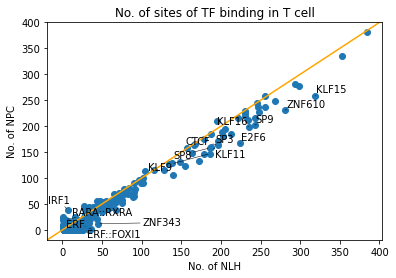

In [85]:
fig, ax = plt.subplots()

ax.scatter(x='NLH_number',y='NPC_number',data=df)

texts=[]
for i,r in displaydf.iterrows():
    texts.append(plt.text(x=r['NLH_number'],y=r['NPC_number'],s=i))
adjust_text(texts,arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

ax.axline((0, 0), slope=1,color='orange')
plt.xlabel('No. of NLH')
plt.ylabel('No. of NPC')
plt.title('No. of sites of TF binding in T cell')

#fig.savefig('/storage/yhhuang/users/ruiyan/NPC/motif/sign_motif/scatter_plot.pdf',bbox_inches='tight',dpi=300)
plt.show()

# plot the heatmap of total expression for Tcell and B cell

In [86]:
import pandas as pd
import numpy as np
import scanpy as sc
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.multitest import multipletests
import colorcet as cc
from matplotlib.pyplot import gcf
import matplotlib.pyplot as plt

In [87]:
df=pd.read_csv('/storage/yhhuang/users/ruiyan/NPC/motif/all_detected_TF_all_mean.csv',index_col=0)
df

,patient_1,patient_10,patient_11,patient_12,patient_13,patient_2,patient_3,patient_4,patient_5,patient_9
gene,,,,,,,,,,
AR,0.000000,0.000000,0.000865,0.000000,0.000000,0.004011,0.001152,0.001858,0.000000,0.001189
ARNT,0.342271,0.362584,0.315060,0.394739,0.430139,0.351768,0.166719,0.295100,0.355657,0.370878
ARNT2,0.000000,0.000000,0.000000,0.000000,0.000000,0.002206,0.002556,0.000000,0.003801,0.009790
ASCL1,0.004962,0.128032,0.000000,0.001076,0.002589,0.014598,0.012209,0.034508,0.017250,0.139915
ATF2,0.596856,0.550159,0.547089,0.572140,0.712652,0.682020,0.396213,0.562547,0.622093,0.637806
...,...,...,...,...,...,...,...,...,...,...
ZNF816,0.094314,0.211076,0.144383,0.199895,0.177125,0.221774,0.066810,0.204921,0.134839,0.238779
ZNF85,0.180769,0.282876,0.240015,0.383053,0.271257,0.215452,0.089222,0.246323,0.438622,0.332769
ZNF93,0.063249,0.149360,0.135524,0.172917,0.236072,0.093984,0.066787,0.108740,0.187153,0.189284


In [88]:
selectgenedf=pd.read_csv('/storage/yhhuang/users/ruiyan/NPC/motif/sign_motif/signif_selected_gene.csv',index_col=0)
selectgenedf

,TF_name
0,NR2C2
1,ZKSCAN5
2,SPIB
3,SPI1
4,ZNF768
...,...
3,RXRG
17,RXRA
41,FIGLA
47,FIGLA


In [89]:
selectgenedf[selectgenedf['TF_name']=='TFAP2A']

,TF_name
42,TFAP2A


In [90]:
selectgenedf[selectgenedf['TF_name']=='FLI1']

,TF_name
1,FLI1
15,FLI1


In [91]:
fisherplotdf=df[df.index.isin(selectgenedf['TF_name'])]
fisherplotdf

,patient_1,patient_10,patient_11,patient_12,patient_13,patient_2,patient_3,patient_4,patient_5,patient_9
gene,,,,,,,,,,
ASCL1,0.004962,0.128032,0.000000,0.001076,0.002589,0.014598,0.012209,0.034508,0.017250,0.139915
CREB3L4,0.098166,0.127224,0.144874,0.174684,0.197471,0.079857,0.062254,0.126597,0.116043,0.177753
CTCF,0.450251,0.472445,0.581356,0.689350,0.680227,0.621130,0.386559,0.438476,0.605926,0.676778
E2F6,0.171659,0.150095,0.183588,0.175761,0.194015,0.163010,0.087817,0.113944,0.119437,0.227525
EBF1,0.414482,0.366425,0.433366,0.742804,0.947613,0.316534,0.150759,0.565170,0.427202,0.464079
...,...,...,...,...,...,...,...,...,...,...
ZNF740,0.176442,0.221887,0.230930,0.217513,0.275099,0.183517,0.078144,0.227918,0.244920,0.211033
ZNF76,0.348439,0.520064,0.586470,0.574503,0.665263,0.437850,0.217416,0.515448,0.370997,0.643699
ZNF768,0.016406,0.027391,0.042569,0.032854,0.057916,0.034945,0.018527,0.055166,0.033906,0.041967


In [92]:
fisherplotdf[fisherplotdf.index=='TFAP2E']

,patient_1,patient_10,patient_11,patient_12,patient_13,patient_2,patient_3,patient_4,patient_5,patient_9
gene,,,,,,,,,,
TFAP2E,0.024045,0.014572,0.008293,0.010851,0.023553,0.012696,0.014019,0.010068,0.019251,0.033075


In [93]:
# fisherplotdf['std']=np.std(fisherplotdf,axis=1)

# fisherplotdf[fisherplotdf['std']==0]

# fisherplotdf.drop(labels=['SP8'],axis=0,inplace=True)
# fisherplotdf

# fisherplotdf.drop(labels=['std'],axis=1,inplace=True)
# fisherplotdf

columndf=pd.DataFrame(fisherplotdf.columns,columns=['name'])
columndf

,name
0,patient_1
1,patient_10
2,patient_11
3,patient_12
4,patient_13
5,patient_2
6,patient_3
7,patient_4
8,patient_5
9,patient_9


In [94]:
columndf['condition']=['NPC','NPC','NLH','NLH','NLH','NPC','NPC','NPC','NPC','NPC']
columndf

,name,condition
0,patient_1,NPC
1,patient_10,NPC
2,patient_11,NLH
3,patient_12,NLH
4,patient_13,NLH
5,patient_2,NPC
6,patient_3,NPC
7,patient_4,NPC
8,patient_5,NPC
9,patient_9,NPC


In [95]:
fisherplotdf

zerols=[]
for i in range(0,len(fisherplotdf)):
    #print(fisherplotdf.iloc[i,:])
    if all(x<0.15 for x in list(fisherplotdf.iloc[i,:])):
        zerols.append(i)

zerols

[0,
 5,
 9,
 10,
 19,
 20,
 21,
 25,
 28,
 29,
 30,
 32,
 35,
 37,
 39,
 42,
 43,
 46,
 51,
 68,
 69,
 71,
 76,
 77,
 85,
 86,
 87,
 88,
 95,
 98,
 103,
 107,
 109,
 114,
 116,
 117,
 119,
 120,
 122,
 125,
 134]

In [96]:
removels=list(fisherplotdf.iloc[zerols,:].index)
removels

['ASCL1',
 'EBF3',
 'EGR4',
 'EHF',
 'ETV2',
 'ETV4',
 'ETV5',
 'FOXI1',
 'GLI3',
 'GLIS2',
 'GLIS3',
 'HIC2',
 'INSM1',
 'KLF1',
 'KLF11',
 'KLF15',
 'KLF16',
 'KLF5',
 'MYOD1',
 'RXRA',
 'RXRG',
 'SNAI2',
 'SP5',
 'SP8',
 'TCFL5',
 'TFAP2A',
 'TFAP2C',
 'TFAP2E',
 'THRB',
 'YY2',
 'ZBTB7C',
 'ZNF135',
 'ZNF16',
 'ZNF320',
 'ZNF341',
 'ZNF343',
 'ZNF417',
 'ZNF449',
 'ZNF530',
 'ZNF610',
 'ZNF768']

In [97]:
fisherplotdf.iloc[zerols,:]

fisherplotdf.drop(labels=removels,axis=0,inplace=True)

len(fisherplotdf)

fisherplotdf[fisherplotdf.index=='TFAP2E']

fisherplotdf

,patient_1,patient_10,patient_11,patient_12,patient_13,patient_2,patient_3,patient_4,patient_5,patient_9
gene,,,,,,,,,,
CREB3L4,0.098166,0.127224,0.144874,0.174684,0.197471,0.079857,0.062254,0.126597,0.116043,0.177753
CTCF,0.450251,0.472445,0.581356,0.689350,0.680227,0.621130,0.386559,0.438476,0.605926,0.676778
E2F6,0.171659,0.150095,0.183588,0.175761,0.194015,0.163010,0.087817,0.113944,0.119437,0.227525
EBF1,0.414482,0.366425,0.433366,0.742804,0.947613,0.316534,0.150759,0.565170,0.427202,0.464079
EGR1,0.802312,1.502497,2.145787,1.206820,2.363112,1.058112,0.817130,1.245364,0.476236,1.697169
...,...,...,...,...,...,...,...,...,...,...
ZNF708,0.368754,0.612738,0.502082,0.477193,0.544392,0.410740,0.195825,0.542349,0.440276,0.549704
ZNF740,0.176442,0.221887,0.230930,0.217513,0.275099,0.183517,0.078144,0.227918,0.244920,0.211033
ZNF76,0.348439,0.520064,0.586470,0.574503,0.665263,0.437850,0.217416,0.515448,0.370997,0.643699


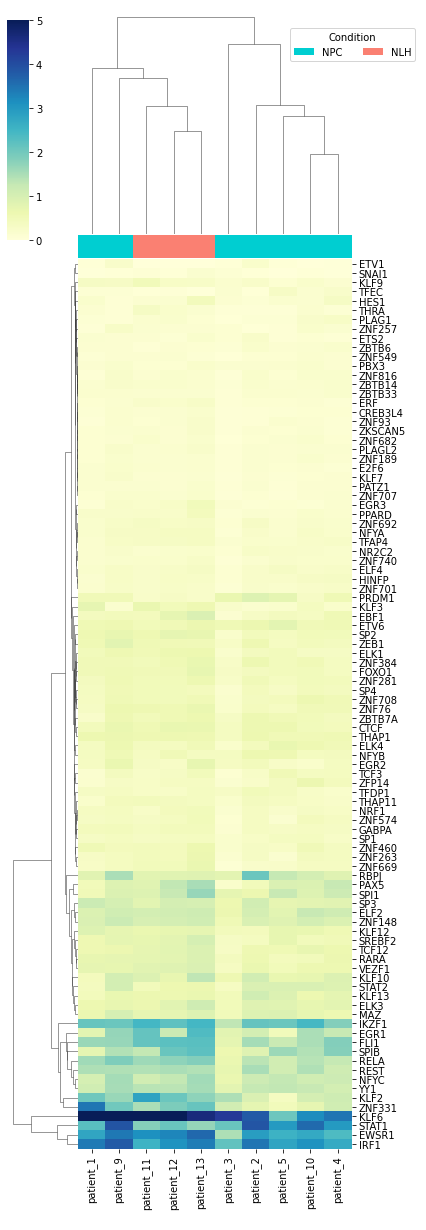

In [98]:
# lut = dict(zip(set(classlabeldf['wide_class']), sns.color_palette(cc.glasbey,len(set(classlabeldf['wide_class'])))))
# lut
# row_colors=classlabeldf['wide_class'].map(lut)

lut1=dict(zip(set(columndf['condition']), ['salmon','darkturquoise']))

#lut1=dict(zip(set(columndf['condition']), sns.color_palette(cc.glasbey,len(set(columndf['condition'])))))
column_colors=columndf['condition'].map(lut1)

#print(column_colors)



fig=sns.clustermap(fisherplotdf,metric='euclidean',method='average',col_colors=[column_colors],cmap='YlGnBu',col_cluster=True,yticklabels=True,row_cluster=True,
                  vmin=0,vmax=5,figsize=(6,17),colors_ratio=0.02)

#fig=sns.clustermap(fisherplotdf,metric='euclidean',method='ward',row_colors=[row_colors],col_colors=column_colors,cmap='YlGnBu',col_cluster=True)
#fig.ax_col_dendrogram.set_visible(False)
fig.ax_heatmap.set_xlabel(" ")
fig.ax_heatmap.set_ylabel(" ")


# for label in classlabeldf['wide_class'].unique():
#     fig.ax_row_dendrogram.bar(0, 0, color=lut[label],label=label, linewidth=0)
# l1=fig.ax_row_dendrogram.legend(title='Class', loc="center", ncol=2, bbox_to_anchor=(1.3, 0.85), bbox_transform=gcf().transFigure) 


for label in columndf['condition'].unique():
    fig.ax_row_dendrogram.bar(0, 0, color=lut1[label],label=label, linewidth=0)
l2=fig.ax_row_dendrogram.legend(title='Condition', loc="center", ncol=2, bbox_to_anchor=(0.82, 0.96), bbox_transform=gcf().transFigure) 

#fig.savefig('/storage/yhhuang/users/ruiyan/figure/figure5/motif/heatmap_mean_expression.pdf',dpi=300,bbox_inches='tight')
plt.show()

#sns.clustermap(fisherplotdf,metric='euclidean',method='ward',row_cluster=True,cmap='YlGnBu')